In [ ]:
dict1 = {
    "Weight": [69, 69, 65, 72, 67, 73, 70, 75, 74, 65, 73, 70, 74, 68, 74],
    "Size": [4.39, 4.21, 4.09, 5.85, 4.7, 5.68, 5.56, 5.11, 5.36, 4.27, 5.79, 5.47, 5.53, 4.47, 5.22],
    "Class": ["orange", "orange", "orange", "apple", "orange", "apple", "apple", "apple", "apple", "orange", "apple", "apple", "apple", "orange", "apple"]
}

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(dict1)
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [ ]:
x = df.iloc[:, 0:2]
x

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70
5,73,5.68
6,70,5.56
7,75,5.11
8,74,5.36
9,65,4.27


In [ ]:
y = df.iloc[:, 2:3]
y

,Class
0,orange
1,orange
2,orange
3,apple
4,orange
5,apple
6,apple
7,apple
8,apple
9,orange


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)
pca_2d

array([[ 1.61179105,  0.42947856],
       [ 1.63766067,  0.60760987],
       [ 5.61338059,  0.15148362],
       [-1.56689544, -0.58420393],
       [ 3.54647457, -0.16474336],
       [-2.5320814 , -0.27224869],
       [ 0.45402014, -0.58465483],
       [-4.42939768,  0.57927401],
       [-3.47570934,  0.1881493 ],
       [ 5.58751097, -0.02664769],
       [-2.54789061, -0.38110671],
       [ 0.46695495, -0.49558917],
       [-3.50014176,  0.01991418],
       [ 2.58991182,  0.20658898],
       [-3.45558852,  0.32669587]])

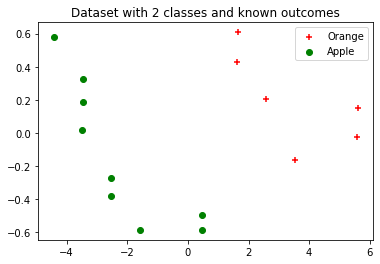

In [ ]:
import matplotlib.pyplot as plt
for i in range(0, df.shape[0]):
  if (y.loc[i, 'Class'] == 'orange'):
    c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
  elif (y.loc[i, 'Class'] == 'apple'):
    c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
plt.legend([c1, c2], ['Orange', 'Apple'])
plt.title('Dataset with 2 classes and known outcomes')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
x_train

,Weight,Size
12,74,5.53
8,74,5.36
13,68,4.47
9,65,4.27
2,65,4.09
6,70,5.56
14,74,5.22
0,69,4.39
7,75,5.11
11,70,5.47


In [ ]:
x_test

,Weight,Size
3,72,5.85
5,73,5.68
4,67,4.70
10,73,5.79
1,69,4.21


In [ ]:
y_train

,Class
12,apple
8,apple
13,orange
9,orange
2,orange
6,apple
14,apple
0,orange
7,apple
11,apple


In [ ]:
y_test

,Class
3,apple
5,apple
4,orange
10,apple
1,orange


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(x_test)
y_pred

array(['apple', 'apple', 'orange', 'apple', 'orange'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0]
 [0 2]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([1., 1.])

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None) # TPR

array([1., 1.])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([1., 1.])

In [ ]:
import numpy as np
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("TPR: ", TPR)
print("TNR: ", TNR)
print("FPR: ", FPR)
print("FNR: ", FNR)

TPR:  [1. 1.]
TNR:  [1. 1.]
FPR:  [0. 0.]
FNR:  [0. 0.]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std

array([[-0.47587339, -1.08347134],
       [-0.47587339, -1.38046349],
       [-1.71728222, -1.57845825],
       [ 0.45518324,  1.32546494],
       [-1.0965778 , -0.57198487],
       [ 0.76553545,  1.04497236],
       [-0.16552118,  0.8469776 ],
       [ 1.38623986,  0.10449724],
       [ 1.07588766,  0.51698633],
       [-1.71728222, -1.28146611],
       [ 0.76553545,  1.22646756],
       [-0.16552118,  0.69848153],
       [ 1.07588766,  0.79747891],
       [-0.78622559, -0.95147483],
       [ 1.07588766,  0.28599244]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_std, y, test_size = 0.30)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
y_pred2 = svclassifier.predict(x_test2)
y_pred2

array(['apple', 'orange', 'apple', 'apple', 'apple'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2, y_pred2)
cm2

array([[4, 0],
       [0, 1]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
a = accuracy_score(y_test2, y_pred2)
p = precision_score(y_test2, y_pred2, average=None)
r = recall_score(y_test2, y_pred2, average=None)
f1 = f1_score(y_test2, y_pred2, average=None)
print("Accuracy: ", a)
print("Precision: ", p)
print("Recall: ", r)
print("F1 score: ", f1)
TP2 = np.diag(cm2)
FP2 = cm2.sum(axis=0) - np.diag(cm2)  
FN2 = cm2.sum(axis=1) - np.diag(cm2)
TN2 = cm2.sum() - (FP2 + FN2 + TP2)
TPR2 = TP2/(TP2+FN2)
TNR2 = TN2/(TN2+FP2) 
FPR2 = FP2/(FP2+TN2)
FNR2 = FN2/(TP2+FN2)
print("TPR: ", TPR2)
print("TNR: ", TNR2)
print("FPR: ", FPR2)
print("FNR: ", FNR2)

Accuracy:  1.0
Precision:  [1. 1.]
Recall:  [1. 1.]
F1 score:  [1. 1.]
TPR:  [1. 1.]
TNR:  [1. 1.]
FPR:  [0. 0.]
FNR:  [0. 0.]


w:  [-0.64649505 -0.9852808 ]
a:  -0.6561531013387677


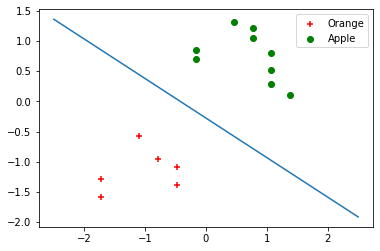

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(0, df.shape[0]):
  if (y.loc[i, 'Class'] == 'orange'):
    c1 = plt.scatter(x_std[i, 0], x_std[i, 1], c='r', marker='+')
  elif (y.loc[i, 'Class'] == 'apple'):
    c2 = plt.scatter(x_std[i, 0], x_std[i, 1], c='g', marker='o')
plt.legend([c1, c2], ['Orange', 'Apple'])

# Create the hyperplane
w = svclassifier.coef_[0]
print("w: ", w)
a = -w[0] / w[1]
print("a: ", a)
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svclassifier.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.show();